# Hamming Distance

The Hamming Distance is a metric used to compare two sequences or strings of equal length. It quantifies the number of positions at which the corresponding symbols or characters in the two sequences are different. Essentially, it counts the "mismatches" between them.

This concept is particularly useful in fields like:

* Error detection and correction in data transmission.
* Bioinformatics for comparing genetic sequences.
* Computer science for tasks like comparing binary data or hash values.

Formula:

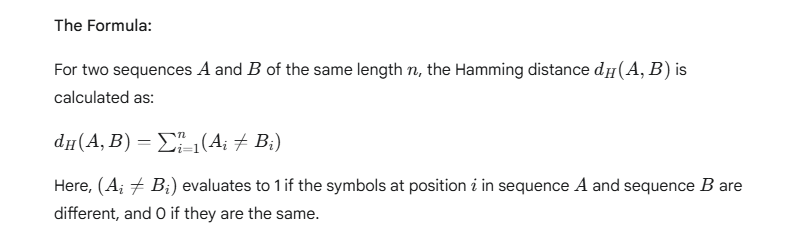

Example: Comparing Product Features

Imagine an online store that uses binary features to describe certain characteristics of products. Let's say we have three features: Bluetooth, Waterproof, and Smart_Home_Compatible. A '1' means the product has the feature, and a '0' means it doesn't.

We want to compare three different product models:

* Product X: Has Bluetooth, is Waterproof, but not Smart Home Compatible.
   * Feature Vector for X: [1, 1, 0]
* Product Y: Has Bluetooth, is NOT Waterproof, and is Smart Home Compatible.
   * Feature Vector for Y: [1, 0, 1]
* Product Z: Is NOT Bluetooth, is NOT Waterproof, and is NOT Smart Home Compatible.
   * Feature Vector for Z: [0, 0, 0]

Let's calculate the Hamming distance between these products:

1. Hamming Distance between Product X and Product Y:

* Compare [1, 1, 0] (Product X) with [1, 0, 1] (Product Y)
* Position 1 (Bluetooth): 1 vs 1 - Match (0 difference)
* Position 2 (Waterproof): 1 vs 0 - Mismatch (1 difference)
* Position 3 (Smart Home): 0 vs 1 - Mismatch (1 difference)

Total Hamming Distance = 0+1+1=2

This means Product X and Product Y differ on 2 of their 3 features.

2. Hamming Distance between Product Y and Product Z:

* Compare [1, 0, 1] (Product Y) with [0, 0, 0] (Product Z)
* Position 1 (Bluetooth): 1 vs 0 - Mismatch (1 difference)
* Position 2 (Waterproof): 0 vs 0 - Match (0 difference)
* Position 3 (Smart Home): 1 vs 0 - Mismatch (1 difference)

Total Hamming Distance = 1+0+1=2

This means Product Y and Product Z also differ on 2 of their 3 features.

3. Hamming Distance between Product X and Product Z:

* Compare [1, 1, 0] (Product X) with [0, 0, 0] (Product Z)
* Position 1 (Bluetooth): 1 vs 0 - Mismatch (1 difference)
* Position 2 (Waterproof): 1 vs 0 - Mismatch (1 difference)
* Position 3 (Smart Home): 0 vs 0 - Match (0 difference)

Total Hamming Distance = 1+1+0=2

Interestingly, in this specific example, all pairs have a Hamming distance of 2.

Interpretation:

A lower Hamming distance indicates that the two sequences or items are more similar in their characteristics. A Hamming distance of 0 means they are identical. A higher Hamming distance means they are more different. This metric is very straightforward for quantifying exact mismatches between fixed-length, often binary, data representations.

# Notebook Structure

1. Import necessary libraries
2. Create the dataset
3. Define the utility function - Hamming Distance
4. Calculate Hamming Distance between different users
5. Calculating Hamming distance leveraging the build in functions in Scipy

# 1. Import necessary libraries

In [13]:
import numpy as np

# 2. Create the dataset

In [14]:
# Example Data: User preferences for 5 genres (Action, Comedy, Drama, Sci-Fi, Horror)
# 1 = Likes, 0 = Dislikes

user_a_prefs = [1, 0, 1, 1, 0] # Likes Action, Drama, Sci-Fi
user_b_prefs = [1, 1, 1, 0, 0] # Likes Action, Comedy, Drama
user_c_prefs = [0, 0, 1, 1, 1] # Likes Drama, Sci-Fi, Horror
user_d_prefs = [1, 0, 1, 1, 0] # Identical to User A

In [15]:
print("--- Hamming Distance Example: Movie Preferences ---")

print(f"User A Preferences: {user_a_prefs}")
print(f"User B Preferences: {user_b_prefs}")
print(f"User C Preferences: {user_c_prefs}")
print(f"User D Preferences: {user_d_prefs}\n")

--- Hamming Distance Example: Movie Preferences ---
User A Preferences: [1, 0, 1, 1, 0]
User B Preferences: [1, 1, 1, 0, 0]
User C Preferences: [0, 0, 1, 1, 1]
User D Preferences: [1, 0, 1, 1, 0]



# 3. Define the utility function - Hamming Distance

In [16]:
def hamming_distance(s1, s2):
    """
    Calculates the Hamming distance between two sequences of equal length.
    Assumes sequences are strings, lists, or numpy arrays.
    """
    if len(s1) != len(s2):
        raise ValueError("Sequences must be of equal length to calculate Hamming distance.")

    distance = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            distance += 1
    return distance

# 4. Calculate Hamming Distance between different users

### A. Calculate Hamming Distance between different users

In [17]:
# Calculate distances

dist_ab = hamming_distance(user_a_prefs, user_b_prefs)
dist_ac = hamming_distance(user_a_prefs, user_c_prefs)
dist_ad = hamming_distance(user_a_prefs, user_d_prefs)

### B. Print the results and interpret

In [18]:
print(f"Hamming Distance between User A and User B: {dist_ab}")
print(f"Hamming Distance between User A and User C: {dist_ac}")
print(f"Hamming Distance between User A and User D: {dist_ad}")

print("\n--- Interpretation ---")
print("A lower Hamming distance indicates greater similarity in preference profiles.")
print("User A and User D have a Hamming distance of 0, meaning their preferences are identical across all genres.")
print("User A and User B, and User A and User C both have a Hamming distance of 2, indicating they differ on two specific genre preferences.")
print("This metric is useful for finding exact matches or quantifying the number of differing binary characteristics.")

Hamming Distance between User A and User B: 2
Hamming Distance between User A and User C: 2
Hamming Distance between User A and User D: 0

--- Interpretation ---
A lower Hamming distance indicates greater similarity in preference profiles.
User A and User D have a Hamming distance of 0, meaning their preferences are identical across all genres.
User A and User B, and User A and User C both have a Hamming distance of 2, indicating they differ on two specific genre preferences.
This metric is useful for finding exact matches or quantifying the number of differing binary characteristics.


# 5. Calculating Hamming distance leveraging the build in functions in Scipy

In [19]:
# use scipy's built-in function for convenience and efficiency

from scipy.spatial.distance import hamming

In [20]:
# Note: scipy.spatial.distance.hamming returns the *normalized* Hamming distance
# (number of mismatches / total length). To get the count of mismatches, multiply by length.

scipy_dist_ab_normalized = hamming(user_a_prefs, user_b_prefs)
scipy_dist_ab_count = scipy_dist_ab_normalized * len(user_a_prefs)

print(f"\nUsing SciPy's hamming function (normalized): {scipy_dist_ab_normalized:.2f}")
print(f"Using SciPy's hamming function (mismatch count): {int(scipy_dist_ab_count)}")


Using SciPy's hamming function (normalized): 0.40
Using SciPy's hamming function (mismatch count): 2
